# blabla


## Data Preparation
We'll start by taking a look at how the datasets are structured and checking for missing values.

In [1]:
# https://archive.ics.uci.edu/dataset/186/wine+quality

import pandas as pd
import numpy as np

np.set_printoptions(threshold=4)

df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")

print(f"The datasets both have {df_red.shape[1]} features. These are the following:")
print(list(df_red.columns))
print(f"\nThe datasets for red and white wine have {df_red.shape[0]} and {df_white.shape[0]} rows, respectively.")

print(f"\nHere are some example entries from the white wine dataset:\n{df_white.head()}")

print("\nThe red wine dataset has the following amount of missing values:")
print(df_red.shape[0] - np.sum(df_red.notna()))

print("\nThe white wine dataset has the following amount of missing values:")
print(df_white.shape[0] - np.sum(df_white.notna()))

The datasets both have 12 features. These are the following:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

The datasets for red and white wine have 1599 and 4898 rows, respectively.

Here are some example entries from the white wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1  

c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Let's look at the distribution of wine quality of the two datasets.

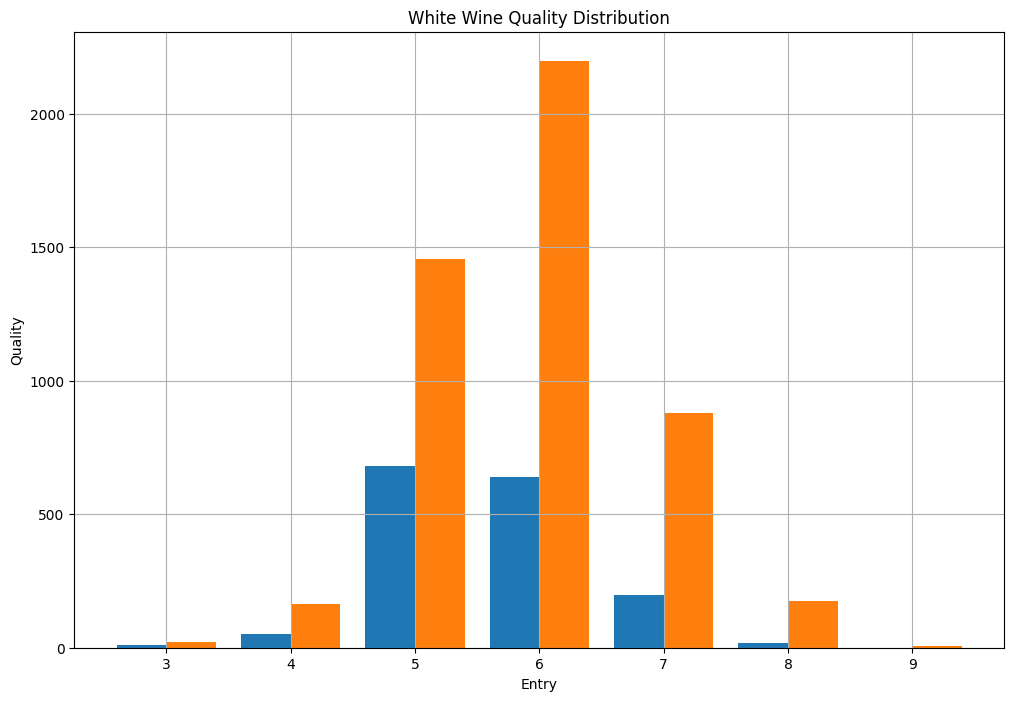

In [2]:
import matplotlib.pyplot as plt

xy_red = np.unique(df_red["quality"], return_counts=True)
xy_white = np.unique(df_white["quality"], return_counts=True)

fig = plt.figure(figsize=(12, 8))

width = 0.4
plt.bar(xy_red[0] - width/2, xy_red[1], width=width, label="Red")
plt.bar(xy_white[0] + width/2, xy_white[1], width=width, label="White")

plt.xlabel("Entry")
plt.ylabel("Quality")
plt.title("White Wine Quality Distribution")
plt.grid(True)
plt.show()

In [3]:
from iterations.it1.nn_layerwise import NeuralNetwork as NN_it1
from iterations.it2.nn_layerwise import NeuralNetwork as NN_it2

Now we will normalize our training data by scaling it down and centering it around 0.

In [4]:
features = df_white.columns[:-1]
target = "quality"

data_raw = df_white.copy().to_numpy()

mean = np.mean(data_raw, axis=0)
std = np.std(data_raw, axis=0)

data_norm = (data_raw - mean) / std

X_norm = data_norm[:, :-1]
y_norm = data_norm[:, -1]

And then we will shuffle it.

In [5]:
num_samples = len(X_norm)

rng = np.random.default_rng(seed=101)
permutation = np.random.permutation(num_samples)

X_shuf = X_norm[permutation]
y_shuf = y_norm[permutation]


Finally we can split the data into train, validation and test sets.

In [6]:
train_end = int(num_samples * 0.7)
val_end = train_end + int(0.15 * num_samples)

X_train = X_shuf[:train_end]
y_train = y_shuf[:train_end]

X_val = X_shuf[train_end:val_end]
y_val = y_shuf[train_end:val_end]

X_test = X_shuf[val_end:]
y_test = y_shuf[val_end:]

In [7]:
nn = NN_it1([11, 5, 1])

nn.train(X=X_train, y=y_train, epochs=0, learning_rate=0.0001, X_val=X_val, y_val=y_val, patience=30, max_epochs=1000, lam=0.05)

In [8]:
print(np.array(nn.loss_history))

[1.35068041 1.30885016 1.25246847 ... 0.76020054 0.76015121 0.76042932]
